In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
import pandas as pd
from scipy.integrate import trapz
from scipy.stats import linregress

# absorption measurments and data analysis

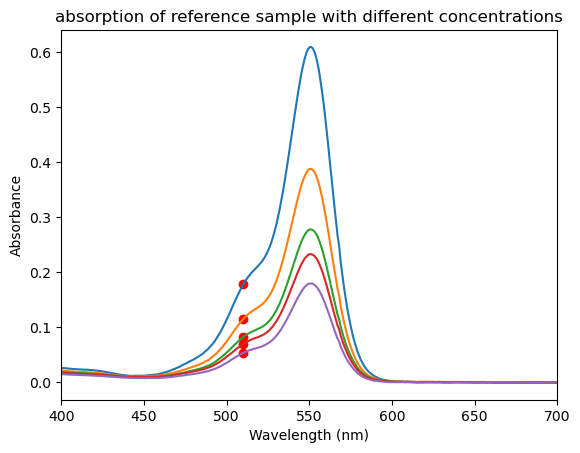

In [2]:
data_abs_ref = pd.read_csv('small nps/reference sample- abs nps Simine.csv')

wavelength_abs_ref = np.array([data_abs_ref.iloc[:, 4], data_abs_ref.iloc[:, 6], data_abs_ref.iloc[:, 8], data_abs_ref.iloc[:, 10], data_abs_ref.iloc[:, 12]])
absorbance_abs_ref = np.array([data_abs_ref.iloc[:, 5], data_abs_ref.iloc[:, 7], data_abs_ref.iloc[:, 9], data_abs_ref.iloc[:, 11], data_abs_ref.iloc[:, 13]])

baseline_values = []

for i in range(len(wavelength_abs_ref)):
    baseline_range = (wavelength_abs_ref[i] >= 650) & (wavelength_abs_ref[i] <= 700)
    baseline = np.mean(absorbance_abs_ref[i][baseline_range])
    absorbance_abs_ref[i] -= baseline
    baseline_values.append(baseline)

absorbance_at_510 = []

for i in range(len(wavelength_abs_ref)):
    for j in range(len(wavelength_abs_ref[i])):
        if wavelength_abs_ref[i][j] == 510:
            absorbance_at_510.append(absorbance_abs_ref[i][j])

for i in range(len(wavelength_abs_ref)):
    plt.plot(wavelength_abs_ref[i], absorbance_abs_ref[i])

plt.xlim(400,700)   
plt.scatter([510]*len(absorbance_at_510), absorbance_at_510, color='red', label='Absorbance at 510 nm')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('absorption of reference sample with different concentrations')
plt.show()
data_ref_em= pd.read_csv('small nps/reference sample - nps simin.csv', delimiter='\t')


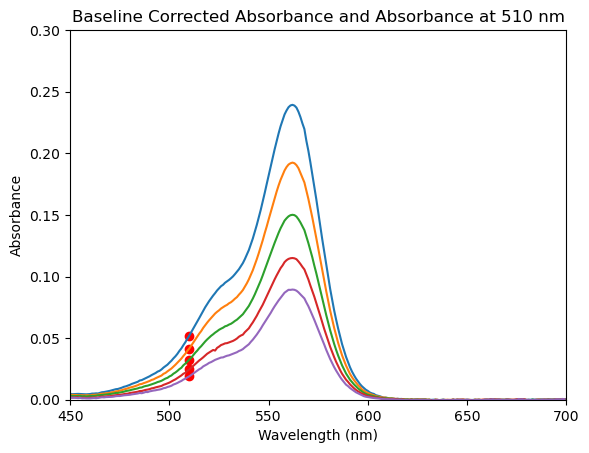

In [3]:
data_abs_sample= pd.read_csv('small nps/sample - abs nps Simin.csv')

absorbance_abs_sample= np.array([data_abs_sample.iloc[:, 5], data_abs_sample.iloc[:, 7], data_abs_sample.iloc[:, 9], data_abs_sample.iloc[:, 11], data_abs_sample.iloc[:, 13]])
wavelength_abs_sample= np.array([data_abs_sample.iloc[:, 4], data_abs_sample.iloc[:, 6], data_abs_sample.iloc[:, 8], data_abs_sample.iloc[:, 10], data_abs_sample.iloc[:, 12]])

baseline_values_s = []

for i in range(len(wavelength_abs_sample)):
    baseline_range = (wavelength_abs_sample[i] >= 650) & (wavelength_abs_sample[i] <= 700)
    baseline = np.mean(absorbance_abs_sample[i][baseline_range])
    absorbance_abs_sample[i] -= baseline
    baseline_values_s.append(baseline)

absorbance_at_510_s = []

for i in range(len(wavelength_abs_sample)):
    for j in range(len(wavelength_abs_sample[i])):
        if wavelength_abs_sample[i][j] == 510:
            absorbance_at_510_s.append(absorbance_abs_sample[i][j])

for i in range(len(wavelength_abs_sample)):
    plt.plot(wavelength_abs_sample[i], absorbance_abs_sample[i])

plt.xlim(450,700)    
plt.ylim(0, 0.3)
plt.scatter([510]*len(absorbance_at_510_s), absorbance_at_510_s, color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance')
plt.title('Baseline Corrected Absorbance and Absorbance at 510 nm')
plt.show()

# emission measurments and data analysis

Text(0.5, 1.0, 'reference')

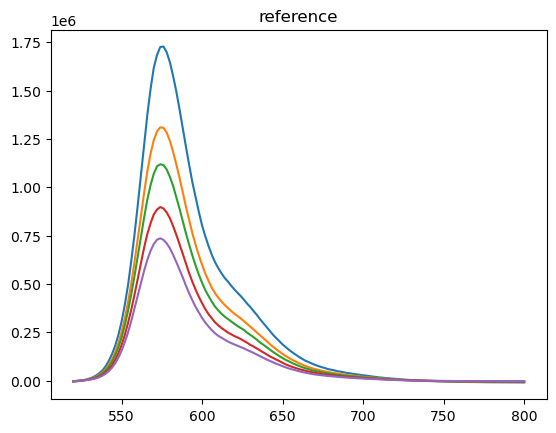

In [4]:
data_ref_em= pd.read_csv('small nps/reference sample - nps simin.csv', delimiter='\t')

wavelength_em_r= data_ref_em['Wavelength[nm]']
spectrum_columns = ['Spectrum2[]', 'Spectrum3[]', 'Spectrum4[]', 'Spectrum5[]', 'Spectrum6[]']


baseline_values_r = []

for column_name in spectrum_columns:
    baseline_range = (wavelength_em_r >= 700) & (wavelength_em_r <= 800)
    baseline = np.mean(data_ref_em[column_name][baseline_range])
    data_ref_em[column_name] -= baseline
    baseline_values_r.append(baseline)
    
    area= np.trapz(data_ref_em[column_name])
    
    plt.plot(wavelength_em_r, data_ref_em[column_name])
plt.title('reference')
    


slope: 242251048.43866122
Correlation coefficient (r value): 0.9758708167575942


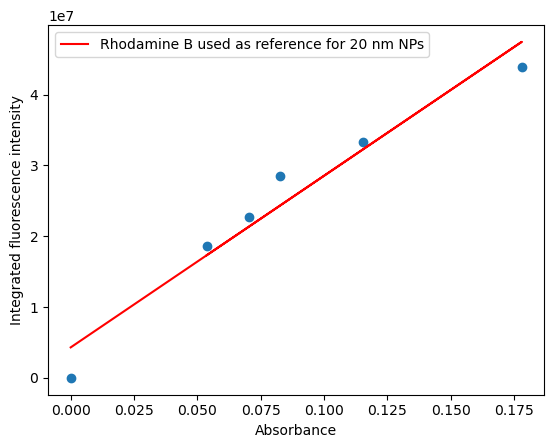

In [5]:
ref_integrated_int= [0,43896577.989913724, 33271924.27112255, 28452549.973458823, 22710509.030016664, 18578265.15478137] 
ref_abs= [0, 0.17795919758739998, 0.115278727797, 0.0825379374294, 0.07019287426780002, 0.053723874617200004]

plt.scatter(ref_abs, ref_integrated_int)

slope_r, intercept_r = np.polyfit(ref_abs, ref_integrated_int, 1)

y_predicted = slope_r * np.array(ref_abs) + intercept_r


correlation_matrix = np.corrcoef(ref_integrated_int, y_predicted)
correlation_coefficient = correlation_matrix[0, 1]

plt.plot(ref_abs, y_predicted, color='red', label='Rhodamine B used as reference for 20 nm NPs')
plt.legend()
plt.xlabel('Absorbance')
plt.ylabel('Integrated fluorescence intensity')
print("slope:", slope_r)
print("Correlation coefficient (r value):", correlation_coefficient)
plt.show()

5658801.48195
4938404.948503846
3879885.2965269233
3032294.4946192307
2392783.803796154


Text(0.5, 1.0, 'sample')

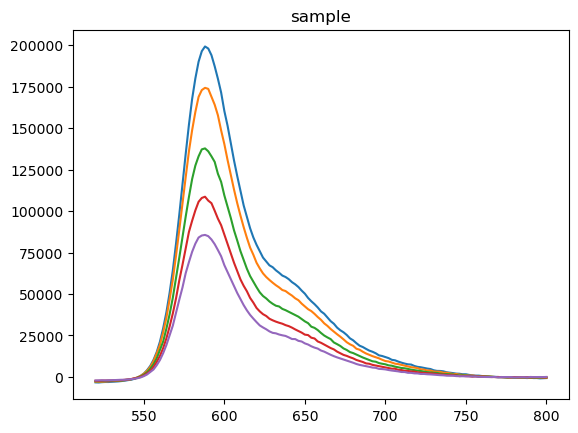

In [6]:
data_sample_em= pd.read_csv('small nps/sample - nps simin.csv',delimiter='\t')

wavelength_sample_s= data_sample_em['Wavelength[nm]']
spectrum_columns_s= ['Spectrum4[]', 'Spectrum5[]', 'Spectrum6[]', 'Spectrum7[]', 'Spectrum8[]']

baseline_values_s = []

for column_name in spectrum_columns_s:
    baseline_range = (wavelength_sample_s >= 750) & (wavelength_sample_s <= 800)
    baseline = np.mean(data_sample_em[column_name][baseline_range])
    data_sample_em[column_name] -= baseline
    baseline_values_s.append(baseline)
    
    area= np.trapz(data_sample_em[column_name])
#     print(area)
    
    plt.plot(wavelength_sample_s, data_sample_em[column_name])
   
    
plt.title('sample')

In [7]:
sample_integrated_intensity=[0,5658801.48195, 4938404.948503846,3879885.2965269233,3032294.4946192307,2392783.803796154]
sample_abs=[0,0.05206108341470588, 0.041557422577400006, 0.03258727729659999, 0.024550115314800003, 0.019006267860000002]

slope: 110286035.68762158
Correlation coefficient (r value): 0.9758708167575942


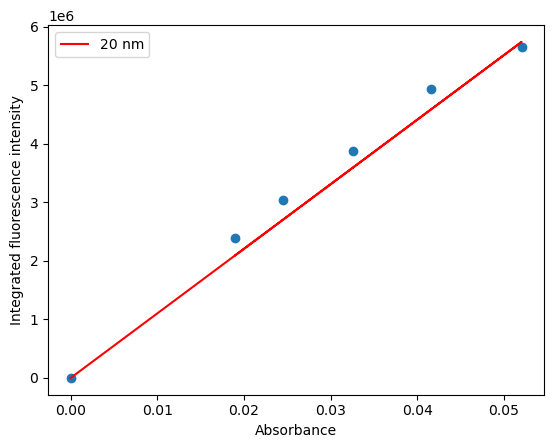

In [8]:
plt.scatter(sample_abs, sample_integrated_intensity)

slope_s, intercept_s = np.polyfit(sample_abs, sample_integrated_intensity, 1)

y_predicteds = slope_s * np.array(sample_abs) 


correlation_matrixs = np.corrcoef(sample_integrated_intensity, y_predicteds)
correlation_coefficients = correlation_matrixs[0, 1]


plt.plot(sample_abs, y_predicteds, color='red', label='20 nm')
plt.legend()
plt.xlabel('Absorbance')
plt.ylabel('Integrated fluorescence intensity')

print("slope:", slope_s)
print("Correlation coefficient (r value):", correlation_coefficient)
plt.show()

(10.0, 40.0)

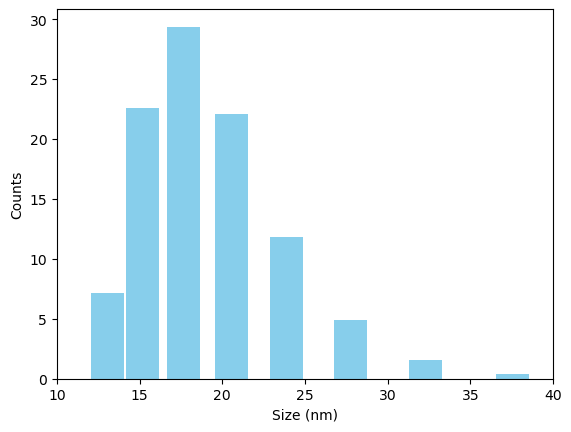

In [9]:
particles_size= np.loadtxt('small nps/Simin nps.txt')

plt.bar(particles_size[:,0], particles_size[:,1], width=2, color='skyblue')
plt.xlabel('Size (nm)')
plt.ylabel('Counts')

plt.xlim(10,40)